# CAUSAL INFERENCE WITH SUPERMARKET DATA

## Dataset

In [1]:
from sklearn import datasets
import pandas as pd

# load supermarket dataset
supermarket = pd.read_csv('supermarket_sales.csv')
supermarket

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## Data preprocessing  and Discovery

In [2]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Preprocessing & Feature Engineering

In [3]:
#Date 
supermarket['date'] = pd.to_datetime(supermarket['Date'])
supermarket['date'] = pd.to_datetime(supermarket['date'])
supermarket['day'] = (supermarket['date']).dt.day
supermarket['month'] = (supermarket['date']).dt.month
supermarket['year'] = (supermarket['date']).dt.year

#Time 
supermarket['Time'] = pd.to_datetime(supermarket['Time'])
supermarket['Hour'] = (supermarket['Time']).dt.hour

In [4]:
supermarket['year'] = pd.to_numeric(supermarket['year'])
supermarket = supermarket.drop("year", axis = 1) #because all trsx are made in 2019
supermarket = supermarket.drop("date", axis = 1)
supermarket = supermarket.drop("Time", axis = 1)

In [5]:
supermarket = supermarket.drop("gross margin percentage", axis = 1) #because relevant for our analysis 

In [6]:
supermarket[supermarket.isnull().any(axis=1)].count()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Payment          0
cogs             0
gross income     0
Rating           0
day              0
month            0
Hour             0
dtype: int64

### Numerical Variables:

In [7]:
supermarket.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,day,month,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270,15.256000,1.993000,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858,8.693563,0.835254,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000,1.000000,1.000000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000,8.000000,1.000000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000,15.000000,2.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000,23.000000,3.000000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000,31.000000,3.000000,20.000000


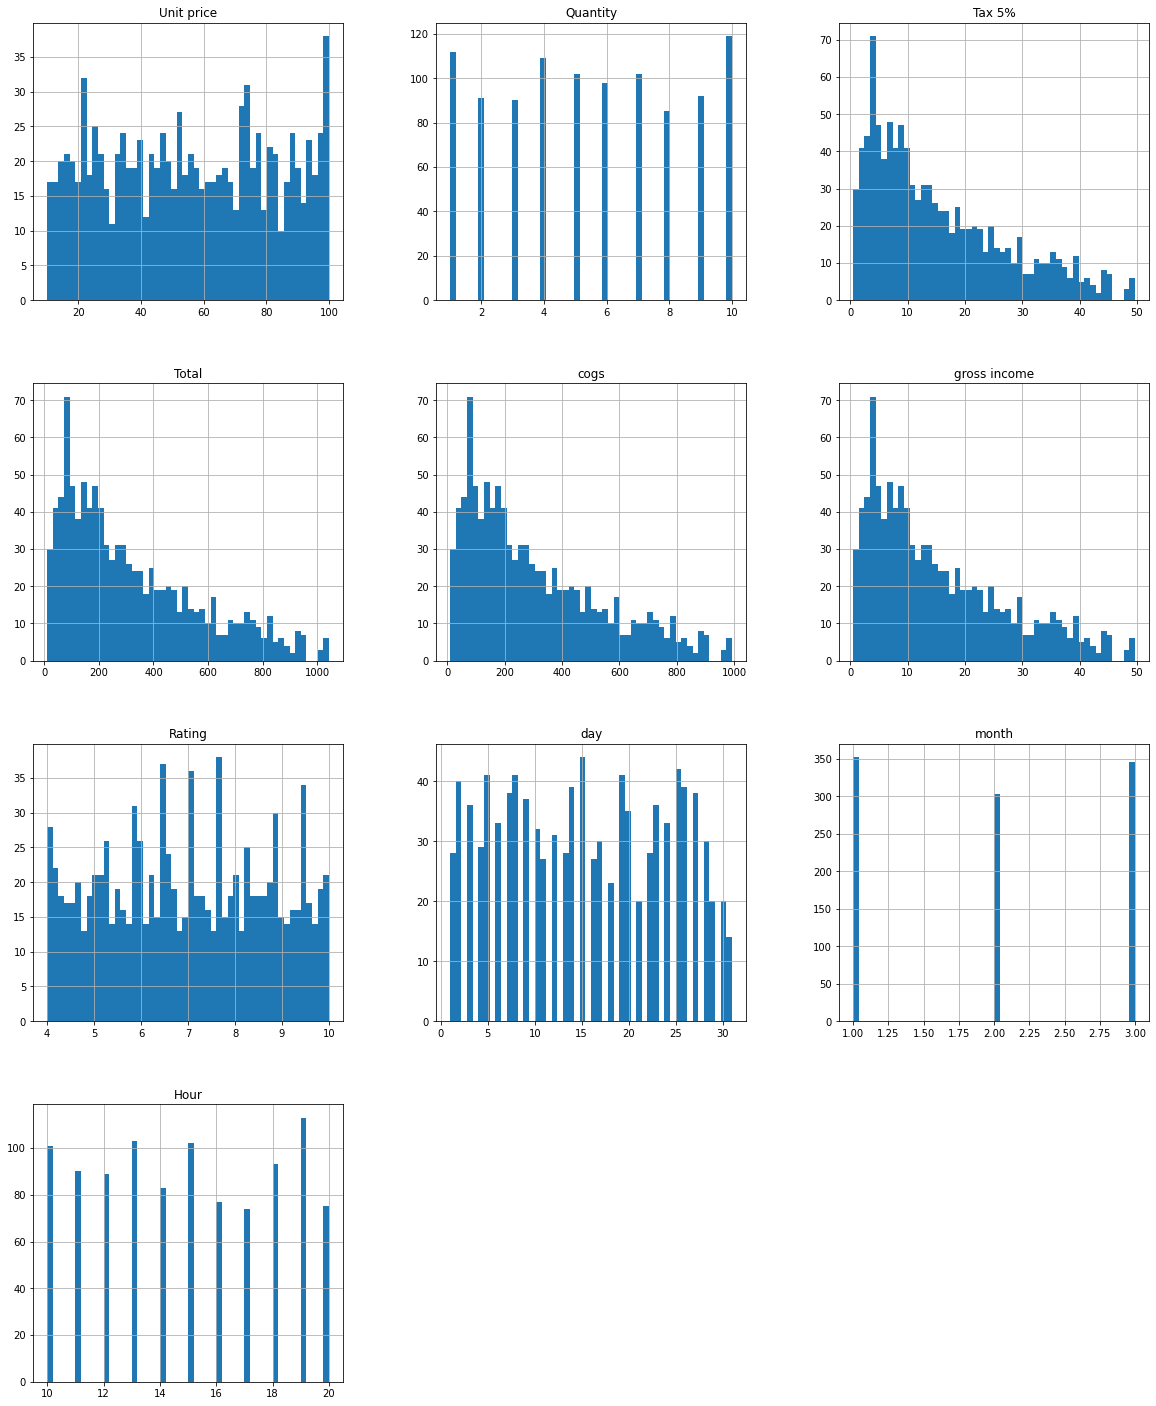

In [8]:
#Visualize the data and assess the distributions
%matplotlib inline
import matplotlib.pyplot as plt
supermarket.hist(bins=50, figsize=(20,25), histtype = 'stepfilled')
plt.show()

### Categorical Variables: 

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='count', ylabel='City'>

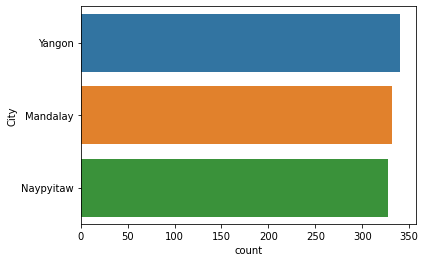

In [10]:
sns.countplot(y = 'City', data=supermarket, order = supermarket['City'].value_counts().index )


<AxesSubplot:xlabel='count', ylabel='Customer type'>

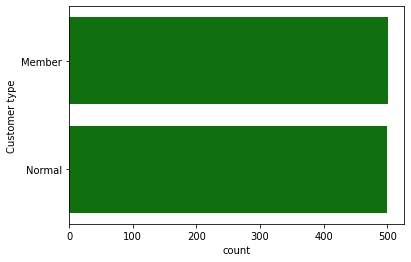

In [11]:
sns.countplot(y="Customer type", data=supermarket, color="green")

<AxesSubplot:xlabel='count', ylabel='Gender'>

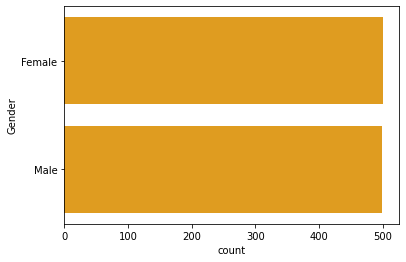

In [12]:
sns.countplot(y="Gender", data=supermarket, color="orange")

### Relationships Assessments 

Text(0.5, 1.0, 'Product Sales per Hour')

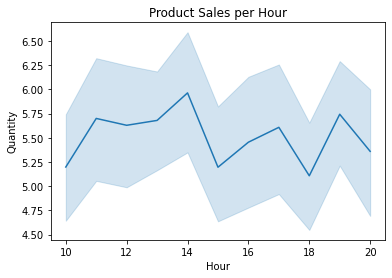

In [13]:
sns.lineplot(x="Hour",  y = 'Quantity',data =supermarket).set_title("Product Sales per Hour")

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

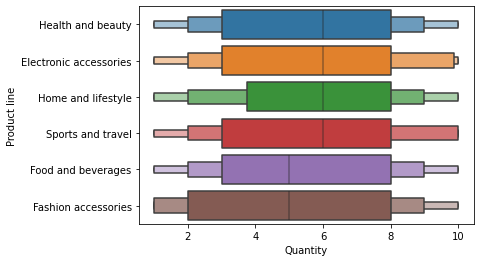

In [14]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=supermarket )

Text(0.5, 1.0, 'Ratings by Branch')

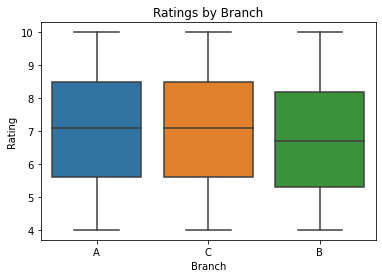

In [15]:
sns.boxplot(x="Branch", y = "Rating" ,data =supermarket).set_title("Ratings by Branch")

Text(0.5, 1.0, 'Payment Channel by Branch')

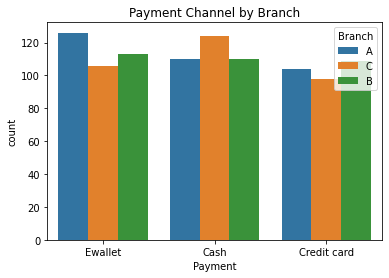

In [16]:
sns.countplot(x="Payment", hue = "Branch", data =supermarket).set_title("Payment Channel by Branch")


In [17]:
corr_matrix = supermarket.corr()
corr_matrix #we can see that gross margin will need some standardization

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,day,month,Hour
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778,0.057021,-0.027387,0.008242
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815,-0.043347,-0.014524,-0.007317
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.002515,-0.022301,-0.002770
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.002515,-0.022301,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.002515,-0.022301,-0.002770
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.002515,-0.022301,-0.002770
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000,-0.007076,-0.042880,-0.030588
day,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,-0.002515,-0.007076,1.000000,-0.118996,0.020668
month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,-0.022301,-0.042880,-0.118996,1.000000,0.043762
Hour,0.008242,-0.007317,-0.002770,-0.002770,-0.002770,-0.002770,-0.030588,0.020668,0.043762,1.000000


<AxesSubplot:xlabel='Total', ylabel='Product line'>

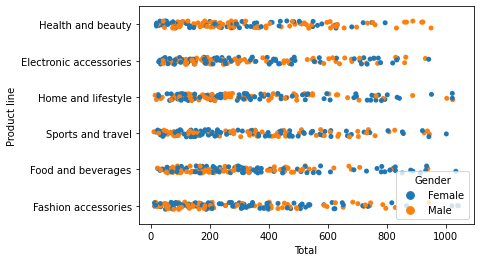

In [18]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=supermarket )


## Causal Inference 



**Focus**: 

After analyzing the questions to be asked about this dataset when it comes to causal inference, we decided to focus on the causal effect of different treatments on the outcome variable: rating that represents the shopping exprience rated by a customer.


**Potential Questions** : 

- What impact does being a member have on the gross income? 

- What impact does the gender have on the shopping experience 

- What impact has shopping in Branch A , B or C (aka City) has on the overall shopping experience ? 



**Hypothesis**: 

- We could think that customers having a member card might get a better shopping experience, might have some perks and could be well taken care of by the staff because they are perceived as THE loyal customers. 

- We could think that there might be a difference in the shopping experience when the customer is a male or female. 

- We could think that the Branch/ City would be determinant in the overall customer experience.This would not be a surprising result


Measure the causal effect of some treatment variable(s) T on an outcome variable Y, controlling for a set of features X ...

In [19]:
import dowhy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,day,month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,522.83,26.1415,9.1,5,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,76.40,3.8200,9.6,8,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,324.31,16.2155,7.4,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,23.2880,8.4,27,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,604.17,30.2085,5.3,8,2,10


<AxesSubplot:xlabel='count', ylabel='Branch'>

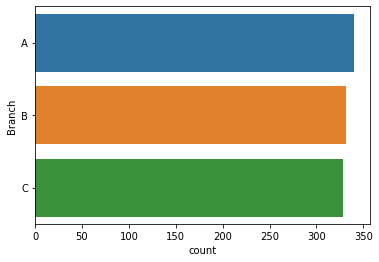

In [21]:
sns.countplot(y = 'Branch', data=supermarket, order = supermarket['Branch'].value_counts().index )
#rather balanced 

In [22]:
from dowhy import CausalModel

In [23]:
import numpy as np
import pandas as pd
import dowhy.api

In [38]:
df1 = supermarket.drop("Invoice ID", axis = 1)
df1 = df1.drop("City", axis = 1)
df1 = df1.drop("cogs", axis = 1) #we remove only cost
df1 = df1.drop("Date", axis = 1)
df1 = df1.drop("gross income", axis = 1)
df1 = df1.drop("Tax 5%", axis = 1)
df1 = df1.drop("Product line", axis = 1)
#df1 = df1[df1['Gender']=="Female"]
df1.head()



,Branch,Customer type,Gender,Unit price,Quantity,Total,Payment,Rating,day,month,Hour
0,A,Member,Female,74.69,7,548.9715,Ewallet,9.1,5,1,13
1,C,Normal,Female,15.28,5,80.2200,Cash,9.6,8,3,10
2,A,Normal,Male,46.33,7,340.5255,Credit card,7.4,3,3,13
3,A,Member,Male,58.22,8,489.0480,Ewallet,8.4,27,1,20
4,A,Normal,Male,86.31,7,634.3785,Ewallet,5.3,8,2,10


In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.getLogger("dowhy").setLevel(logging.INFO)

In [26]:
#conda install graphviz --yes

In [27]:
#pip install pygraphviz

In [40]:
#Encode the categorical variables of interest 
df1 = pd.get_dummies(df1, columns=["Branch"])
df1 = pd.get_dummies(df1, columns=["Payment"])
#Renove space 
df1 = df1.rename({'Customer type': 'Customer_type', 'Unit price':'Unit_price'}, axis=1) 
df1 = df1.rename({'Customer_type': 'Member_Card'}, axis=1)
df1 = df1.rename({'Payment_Credit card': 'Payment_Creditcard'}, axis=1) 

df1.head()


,Member_Card,Gender,Unit_price,Quantity,Total,Rating,day,month,Hour,Branch_A,Branch_B,Branch_C,Payment_Cash,Payment_Creditcard,Payment_Ewallet
0,Member,Female,74.69,7,548.9715,9.1,5,1,13,1,0,0,0,0,1
1,Normal,Female,15.28,5,80.2200,9.6,8,3,10,0,0,1,1,0,0
2,Normal,Male,46.33,7,340.5255,7.4,3,3,13,1,0,0,0,1,0
3,Member,Male,58.22,8,489.0480,8.4,27,1,20,1,0,0,0,0,1
4,Normal,Male,86.31,7,634.3785,5.3,8,2,10,1,0,0,0,0,1


## Treatment : Having a Member Card 

In [41]:
df2 = df1.copy()
df2 = df2.drop("Gender", axis = 1)


In [42]:
df2['Member_Card']= df2['Member_Card'].replace('Member',True)
df2['Member_Card']= df2['Member_Card'].replace('Normal',False)

### Graphical Model

In [43]:
causal_graph1 = """digraph {
Rating[label = "Customer_Experience_Rating"];
Member_Card[label = "Member_Card"];
Unit_price[label = "Unit_price"]; 
Quantity[label = "Quantity"];
Total[label = "Total"]; 
Rating[label = "Rating"];
day[label = "Weekday"];
month[label = "Month"];
day->Rating;
month->Rating;
Member_Card -> Rating;
Quantity -> Total; Total -> Rating;
Unit_price -> Total

Payment_Cash -> Branch_A ; Branch_A -> Rating;
Payment_Creditcard -> Branch_A ; Branch_A -> Rating;
Payment_Ewallet -> Branch_A ; Branch_A -> Rating;

Payment_Cash  -> Branch_B ; Branch_B -> Rating;
Payment_Creditcard -> Branch_B ; Branch_B -> Rating;
Payment_Ewallet -> Branch_B ; Branch_B -> Rating;

Payment_Cash  -> Branch_C ; Branch_C -> Rating;
Payment_Creditcard -> Branch_C ; Branch_C -> Rating;
Payment_Ewallet -> Branch_C ; Branch_C -> Rating;
}"""

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Member_Card'] on outcome ['Rating']


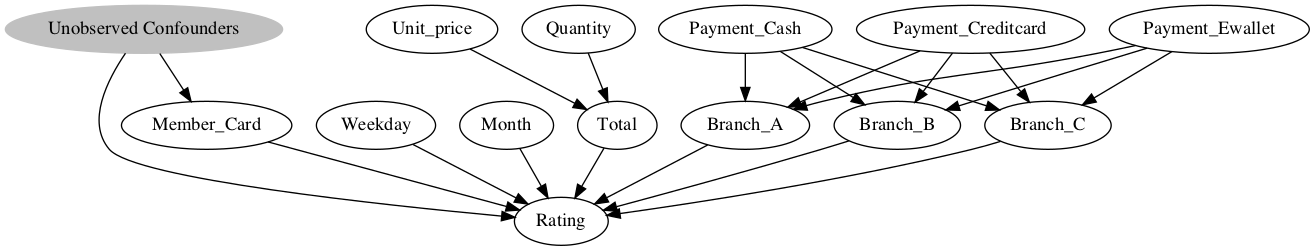

In [44]:
model1 = dowhy.CausalModel(
    data= df2,
    graph = causal_graph1.replace("\n", " "),
    treatment = 'Member_Card' ,
    outcome='Rating',
common_causes = 'Branch_A+Branch_B+Hour+Total'.split('+'))
model1.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

### Identifying the causal effect

In [93]:
#Identify the causal effect
identified_estimand1 = model1.identify_effect(proceed_when_unidentifiable=True)
#print(identified_estimand1)


INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]


### Estimate the effect: Regression

In [46]:
estimate1 = model1.estimate_effect(identified_estimand1,
        method_name="backdoor.linear_regression",test_significance=True)
print(estimate1)
print("Causal Estimate is " + str(estimate1.value))


INFO:dowhy.causal_estimator:b: Rating~Member_Card+Quantity+Unit_price+Branch_C+Branch_B+Payment_Cash+month+Payment_Ewallet+Total+Payment_Creditcard+day+Branch_A+Member_Card*Quantity+Member_Card*Unit_price+Member_Card*Branch_C+Member_Card*Branch_B+Member_Card*Payment_Cash+Member_Card*month+Member_Card*Payment_Ewallet+Member_Card*Total+Member_Card*Payment_Creditcard+Member_Card*day+Member_Card*Branch_A
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: Rating~Member_Card+Quantity+Unit_price+Branch_C+Branch_B+Payment_Cash+month+Payment_Ewallet+Total+Payment_Creditcard+day+Branch_A+Member_Card*Quantity+Member_Card*Unit_price+Member_Card*Branch_C+Member_Card*Branch_B+Member_Card*Payment_Cash+Member_Card*month+Member_Card*Payment_Ewallet+Member_Card*Total+Member_Card*Payment_Creditcard+Member_Card*day+Member_Card*Branch_A
Target units: ate

## Estimate
Mean value: -0.07453557771652353
p-value: [0.84256195]
### Conditional Estimates
__categorical__Quantity  __categorical__Unit_price  __categorical__Branch_C  __categorical__Branch_B  __categorical__Payment_Cash  __categorical__month  __categorical__Payment_Ewallet  __categorical__Total          __categorical__Payment_Creditcard  __categorical__day  __categorical__Branch_A
(0.999, 2.0]             (10.079, 27.212]           (-0.001, 1.0]            (-0.001, 1.0]            (-0.001, 1.0]

## Treatment: Being a Female over being a Male

In [47]:
df3 = df1.copy()

In [48]:
df3['Gender']= df3['Gender'].replace('Female',True)
df3['Gender']= df3['Gender'].replace('Male',False)
df3 = df3.rename({'Gender': 'Female'}, axis=1) 

### Graphical Model

In [49]:
import pygraphviz

In [64]:

causal_graph2 = """digraph {
Rating[label = "Customer_Experience_Rating"];
Unit_price[label = "Unit_price"]; 
Quantity[label = "Quantity"];
Total[label = "Total"]; 
Rating[label = "Rating"];
day[label = "Weekday"];
month[label = "Month"];
Female -> Rating;
day->Rating;
month->Rating;
Quantity -> Total; Total -> Rating;
Unit_price -> Total

Payment_Cash -> Branch_A ; Branch_A -> Rating;
Payment_Creditcard -> Branch_A ; Branch_A -> Rating;
Payment_Ewallet -> Branch_A ; Branch_A -> Rating;

Payment_Cash  -> Branch_B ; Branch_B -> Rating;
Payment_Creditcard -> Branch_B ; Branch_B -> Rating;
Payment_Ewallet -> Branch_B ; Branch_B -> Rating;

Payment_Cash  -> Branch_C ; Branch_C -> Rating;
Payment_Creditcard -> Branch_C ; Branch_C -> Rating;
Payment_Ewallet -> Branch_C ; Branch_C -> Rating;
}"""

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Female'] on outcome ['Rating']


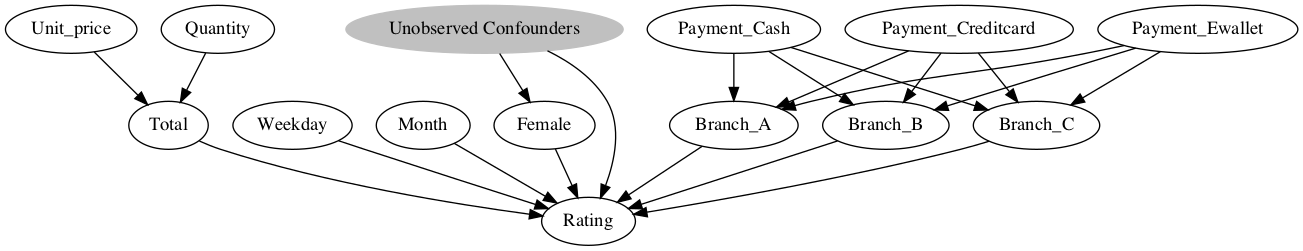

In [65]:
model2 = dowhy.CausalModel(
    data= df3,
    graph = causal_graph2.replace("\n", " "),
    treatment = 'Female' ,
    outcome='Rating',
common_causes = 'Branch_A+Branch_B+Hour'.split('+'))
model2.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

### Identify the causal effect

In [94]:
#Identify the causal effect
identified_estimand2 = model2.identify_effect(proceed_when_unidentifiable=True)
#print(identified_estimand2)


INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]


### Estimating the effect: regression

In [67]:
estimate2 = model2.estimate_effect(identified_estimand2,
        method_name="backdoor.linear_regression",test_significance=True)
print(estimate2)
#print("Causal Estimate is " + str(estimate2.value))


INFO:dowhy.causal_estimator:b: Rating~Female+Quantity+Unit_price+Branch_C+Branch_B+Payment_Cash+month+Payment_Ewallet+Total+Payment_Creditcard+day+Branch_A+Female*Quantity+Female*Unit_price+Female*Branch_C+Female*Branch_B+Female*Payment_Cash+Female*month+Female*Payment_Ewallet+Female*Total+Female*Payment_Creditcard+Female*day+Female*Branch_A
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: Rating~Female+Quantity+Unit_price+Branch_C+Branch_B+Payment_Cash+month+Payment_Ewallet+Total+Payment_Creditcard+day+Branch_A+Female*Quantity+Female*Unit_price+Female*Branch_C+Female*Branch_B+Female*Payment_Cash+Female*month+Female*Payment_Ewallet+Female*Total+Female*Payment_Creditcard+Female*day+Female*Branch_A
Target units: ate

## Estimate
Mean value: -0.022639341832364934
p-value: [0.94557073]
### Conditional Estimates
__categorical__Quantity  __categorical__Unit_price  __categorical__Branch_C  __categorical__Branch_B  __categorical__Payment_Cash  __categorical__month  __categorical__Payment_Ewallet  __categorical__Total          __categorical__Payment_Creditcard  __categorical__day  __categorical__Branch_A
(0.999, 2.0]             (10.079, 27.212]           (-0.001, 1.0]            (-0.001, 1.0]            (-0.001, 1.0]                (0.999, 2.0]          (-0.001, 1.0]        

**Assumptions when building the graphical model**:

- Gender could serve as heterogenous treatment so we tried to run models only with women on one  and men on the other model: check results 

- Common Causes represent the variables that according to us have a causal affect on both Outcome and Treatment. As per our causal assumptions, the variables satisfying this criteria are unobserved confounders and the branches.


## Treatment: Shopping in Branch C or not 

### Graphical Model

In [72]:
df4 = df1.copy()
#Branch_C
df4['Branch_C'] = df4['Branch_C'].apply(bool)

In [84]:
causal_graph3 = """digraph {
Rating[label = "Customer_Experience_Rating"];
Unit_price[label = "Unit_price"]; 
Quantity[label = "Quantity"];
Total[label = "Total"]; 
Rating[label = "Rating"];
day[label = "Weekday"];
month[label = "Month"];
day->Rating;
month->Rating;
Quantity -> Total; Total -> Rating;
Unit_price -> Total

Payment_Cash -> Branch_A ; Branch_A -> Rating;
Payment_Creditcard -> Branch_A ; Branch_A -> Rating;
Payment_Ewallet -> Branch_A ; Branch_A -> Rating;

Payment_Cash  -> Branch_B ; Branch_B -> Rating;
Payment_Creditcard -> Branch_B ; Branch_B -> Rating;
Payment_Ewallet -> Branch_B ; Branch_B -> Rating;

Payment_Cash  -> Branch_C ; Branch_C -> Rating;
Payment_Creditcard -> Branch_C ; Branch_C -> Rating;
Payment_Ewallet -> Branch_C ; Branch_C -> Rating;
}"""

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Branch_C'] on outcome ['Rating']


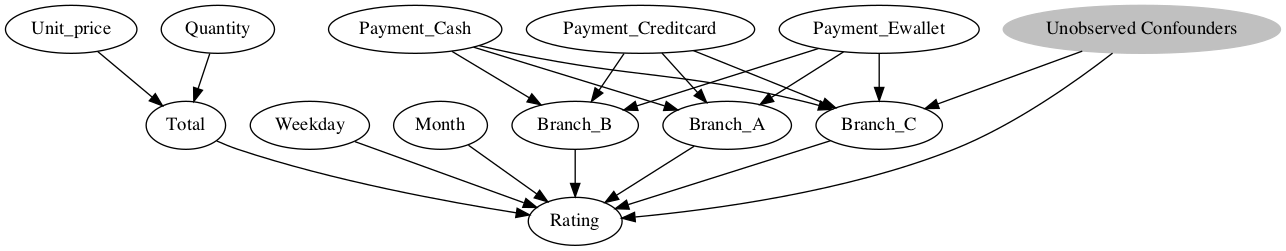

In [85]:
model3 = dowhy.CausalModel(
    data= df4,
    graph = causal_graph3.replace("\n", " "),
    treatment = 'Branch_C' ,
    outcome='Rating',
common_causes = 'Branch_A+Branch_B+Hour'.split('+'))
model3.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

### Identifying the causal effect

We say that Treatment causes Outcome if changing Treatment leads to a change in Outcome keeping everything else constant. Thus in this step, by using properties of the causal graph, we identify the causal effect to be estimated. We are interested in the effect of doing their groceries/shooping in Branch C compared to the two others. Branch C is the supermarket in the city Naypyitaw. 



In [86]:
#Identify the causal effect
identified_estimand3 = model3.identify_effect(proceed_when_unidentifiable=True)
#print(identified_estimand)

INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]


### Estimate the identified estimand : Regression

The Average Treatment Effect measures the difference in mean (average) outcomes between units assigned to the treatment and units assigned to the control.

In [87]:
estimate3 = model3.estimate_effect(identified_estimand3,
        method_name="backdoor.linear_regression",test_significance=True)
print(estimate3)
print("Causal Estimate is " + str(estimate3.value))


INFO:dowhy.causal_estimator:b: Rating~Branch_C+Quantity+Unit_price+Branch_B+Payment_Cash+month+Payment_Ewallet+Total+Payment_Creditcard+day+Branch_A+Branch_C*Branch_A+Branch_C*Quantity+Branch_C*Unit_price+Branch_C*Total+Branch_C*Branch_B+Branch_C*day+Branch_C*month
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: Rating~Branch_C+Quantity+Unit_price+Branch_B+Payment_Cash+month+Payment_Ewallet+Total+Payment_Creditcard+day+Branch_A+Branch_C*Branch_A+Branch_C*Quantity+Branch_C*Unit_price+Branch_C*Total+Branch_C*Branch_B+Branch_C*day+Branch_C*month
Target units: ate

## Estimate
Mean value: 1.3466346291312759
p-value: [0.0001715]
### Conditional Estimates
__categorical__Branch_A  __categorical__Quantity  __categorical__Unit_price  __categorical__Total          __categorical__Branch_B  __categorical__day  __categorical__month
(-0.001, 1.0]            (0.999, 2.0]             (10.079, 27.212]           (10.677000000000001, 97.738]  (-0.001, 1.0]            (0.999, 6.0]        (0.999, 2.0]            1.487760
                                                                                                                                                        (2.0, 3.0]              1.369773
       

After analyzing the effect of 3 treatments (gender, member card and shopping at Branch C) on our outcome variable rating, representing the shopping experience rated by the customer herself/himself; **we can see that shopping at Branch is the only treatment (pvalue < 0.001, ie 0.0001715) that has a significant effect on the rating. There is on average a different of 1.35 between ratings of customers shopping in the city Naypyitaw and the others.**
Now we will be seing the other models we could be using other than regression for Treatment = Branch C: 

### Matching

In [88]:
causal_estimate_match = model3.estimate_effect(identified_estimand3,
                                              method_name="backdoor.propensity_score_matching",
                                              target_units="atc")
print(causal_estimate_match)
print("Causal Estimate is " + str(causal_estimate_match.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: Rating~Branch_C+Quantity+Unit_price+Branch_B+Payment_Cash+month+Payment_Ewallet+Total+Payment_Creditcard+day+Branch_A
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOL

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: Rating~Branch_C+Quantity+Unit_price+Branch_B+Payment_Cash+month+Payment_Ewallet+Total+Payment_Creditcard+day+Branch_A
Target units: atc

## Estimate
Mean value: 2.5761904761904764

Causal Estimate is 2.5761904761904764


### Weighting

In [89]:
causal_estimate_ipw = model3.estimate_effect(identified_estimand3,
                                            method_name="backdoor.propensity_score_weighting",
                                            target_units = "ate",
                                            method_params={"weighting_scheme":"ips_weight"})
print(causal_estimate_ipw)
print("Causal Estimate is " + str(causal_estimate_ipw.value))


INFO:dowhy.causal_estimator:INFO: Using Propensity Score Weighting Estimator
INFO:dowhy.causal_estimator:b: Rating~Branch_C+Quantity+Unit_price+Branch_B+Payment_Cash+month+Payment_Ewallet+Total+Payment_Creditcard+day+Branch_A
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: Rating~Branch_C+Quantity+Unit_price+Branch_B+Payment_Cash+month+Payment_Ewallet+Total+Payment_Creditcard+day+Branch_A
Target units: ate

## Estimate
Mean value: -2.433118057712612

Causal Estimate is -2.433118057712612


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Refute Results 

## Random Common Cause

It adds randomly drawn covariates to data and re-runs the analysis to see if the causal estimate changes or not. If our assumption was originally correct then the causal estimate shouldn’t change by much.

In [90]:
#Adding a random common cause variable
refute1_results=model3.refute_estimate(identified_estimand3, estimate3,
        method_name="random_common_cause")
print(refute1_results)

INFO:dowhy.causal_estimator:b: Rating~Branch_C+Quantity+Unit_price+Branch_B+Payment_Cash+month+Payment_Ewallet+Total+Payment_Creditcard+day+Branch_A+w_random+Branch_C*Branch_A+Branch_C*Quantity+Branch_C*Unit_price+Branch_C*Total+Branch_C*Branch_B+Branch_C*day+Branch_C*month
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= 

Refute: Add a Random Common Cause
Estimated effect:1.3466346291312759
New effect:1.3512607674082462



We can see that the causal estimate does not change much, therefore our original assumption was correct for Branch C. 

## Replacing treatment with a random (placebo) variable


In [92]:
#Replacing treatment with a random (placebo) variable
refutation = model3.refute_estimate(identified_estimand3, estimate3, method_name="placebo_treatment_refuter",
                     placebo_type="permute", num_simulations=2)
print(refutation)

INFO:dowhy.causal_refuters.placebo_treatment_refuter:Refutation over 2 simulated datasets of permute treatment
INFO:dowhy.causal_estimator:b: Rating~placebo+Quantity+Unit_price+Branch_B+Payment_Cash+month+Payment_Ewallet+Total+Payment_Creditcard+day+Branch_A+placebo*Branch_A+placebo*Quantity+placebo*Unit_price+placebo*Total+placebo*Branch_B+placebo*day+placebo*month
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: Rating~placebo+Quantity+Unit_price+Branch_B+Payment_Cash+month+Payment_Ewallet+Total+Payment_Creditcard+day+Branch_A+placebo*Branch_A+placebo*Quantity+placebo*Unit_price+placebo*Total+placebo*Branch_B+placebo*day+placebo*month
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
                 Note: The underlying distribution may not be Normal. We assume that it approaches normal with the increase in sample size.


Refute: Use a Placebo Treatment
Estimated effect:1.3466346291312759
New effect:-0.10495568992211801
p value:0.2823323651216887

